In [8]:
import pandas as pd
import tqdm.auto as tqdm

In [2]:
pd.__version__

'1.2.3'

In [2]:
# ! sudo apt install curl
! curl -O http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-1K.tar.gz
! curl -O  http://mtg.upf.edu/static/datasets/last.fm/lastfm-dataset-360K.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 62  641M   62  401M    0     0   173k      0  1:03:08  0:39:31  0:23:37     0 124k 0:46:37  0:00:33  0:46:04  231k 0:46:29  174k  0:44:18  131k1:58  0:44:33  136k36  121kk      0  0:52:23  0:02:29  0:49:54 9989534  0:04:58  0:51:36  100k  0  0:56:47  0:04:59  0:51:48  116k53:03  113k:06:08  0:50:41  373k49:41  237k0:49:26  227k 192k      0  0:56:53  0:07:10  0:49:43  188k:07  119k:46:18  320k 0:46:58  111k:47:02  113k6:04  0:09:00  0:47:04 991159:07  0:47:05  166k 0:47:06  146k  0:09:33  0:46:23  180k:37  194k:56:13  0:09:53  0:46:20  276k14  0:09:54  0:46:20  232k   0  0:56:46  0:10:05  0:46:41  159kk      0  0:56:48  0:10:06  0:46:42  142k:05  0:10:32  0:45:33  136k53  0:11:07  0:43:46  717k 399k:39:47  243k:39:52 90537 0:40:01  116k0:19  117k0     0   204k      0  0:53:32  0:13:30  0:40:02  258k  0:39:39  291k  0:38:53  355k0:

In [6]:
! tar -xf ./lastfm-dataset-1K.tar.gz
! tar -xf ./lastfm-dataset-360K.tar.gz

lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv: truncated gzip input
tar: Error exit delayed from previous errors.


### Dataset ~1K users, demographic data

In [3]:
lastfm_1_demo = pd.read_csv('data.nosync/lastfm-dataset-1K/userid-profile.tsv', sep='\t', header=0,
    names=[
        'user_id', 'gender', 'age', 'country' , 'signup'
    ])
lastfm_1_demo["signup"] = pd.to_datetime(lastfm_1_demo.signup)
lastfm_1_demo.sort_values(['user_id'], ascending=True, inplace=True)

In [4]:
lastfm_1_demo.head()

,user_id,gender,age,country,signup
0,user_000001,m,NaN,Japan,2006-08-13
1,user_000002,f,NaN,Peru,2006-02-24
2,user_000003,m,22.0,United States,2005-10-30
3,user_000004,f,NaN,NaN,2006-04-26
4,user_000005,m,NaN,Bulgaria,2006-06-29


In [5]:
lastfm_1_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  992 non-null    object        
 1   gender   884 non-null    object        
 2   age      286 non-null    float64       
 3   country  907 non-null    object        
 4   signup   984 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.5+ KB


In [6]:
lastfm_1_demo.describe(include='all', datetime_is_numeric=True)

,user_id,gender,age,country,signup
count,992,884,286.000000,907,984
unique,992,2,NaN,66,NaN
top,user_000478,m,NaN,United States,NaN
freq,1,502,NaN,228,NaN
mean,NaN,NaN,25.367133,NaN,2006-02-18 21:05:51.219512320
min,NaN,NaN,3.000000,NaN,2002-10-29 00:00:00
25%,NaN,NaN,21.000000,NaN,2005-08-14 00:00:00
50%,NaN,NaN,23.000000,NaN,2006-03-03 12:00:00
75%,NaN,NaN,28.000000,NaN,2006-08-30 06:00:00
max,NaN,NaN,103.000000,NaN,2009-11-05 00:00:00


### Dataset ~1K users, behavioral data

In [7]:
lastfm_1_behav = pd.read_csv('data.nosync/lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv', sep='\t', header=None,
                             names=[
                                    'user_id', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name'
                                ],
                             skiprows=[
                                    2120260-1, 2446318-1, 11141081-1,
                                    11152099-1, 11152402-1, 11882087-1,
                                    12902539-1, 12935044-1, 17589539-1
                                ]) # use chunksize=#_of_rows if you get out of memory 
lastfm_1_behav["timestamp"] = pd.to_datetime(lastfm_1_behav.timestamp)
lastfm_1_behav.sort_values(['user_id', 'timestamp'], ascending=True, inplace=True)

In [9]:
lastfm_1_behav.head()

,user_id,timestamp,artist_id,artist_name,track_id,track_name
16684,user_000001,2006-08-13 13:59:20+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,c4633ab1-e715-477f-8685-afa5f2058e42,The Launching Of Big Face
16683,user_000001,2006-08-13 14:03:29+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,bc2765af-208c-44c5-b3b0-cf597a646660,Zn Zero
16682,user_000001,2006-08-13 14:10:43+00:00,09a114d9-7723-4e14-b524-379697f6d2b5,Plaid & Bob Jaroc,aa9c5a80-5cbe-42aa-a966-eb3cfa37d832,The Return Of Super Barrio - End Credits
16681,user_000001,2006-08-13 14:17:40+00:00,67fb65b5-6589-47f0-9371-8a40eb268dfb,Tommy Guerrero,d9b1c1da-7e47-4f97-a135-77260f2f559d,Mission Flats
16680,user_000001,2006-08-13 14:19:06+00:00,1cfbc7d1-299c-46e6-ba4c-1facb84ba435,Artful Dodger,120bb01c-03e4-465f-94a0-dce5e9fac711,What You Gonna Do?


In [10]:
lastfm_1_behav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19098853 entries, 16684 to 19080480
Data columns (total 6 columns):
 #   Column       Dtype              
---  ------       -----              
 0   user_id      object             
 1   timestamp    datetime64[ns, UTC]
 2   artist_id    object             
 3   artist_name  object             
 4   track_id     object             
 5   track_name   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1020.0+ MB


In [11]:
lastfm_1_behav.describe(include='all', datetime_is_numeric=True)

,user_id,timestamp,artist_id,artist_name,track_id,track_name
count,19098853,19098853,18498005,19098853,16936134,19098841
unique,992,NaN,107295,173921,960402,1083471
top,user_000949,NaN,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6,Intro
freq,183103,NaN,115099,115099,3991,17561
mean,NaN,2007-09-21 13:53:40.753054464+00:00,NaN,NaN,NaN,NaN
min,NaN,2005-02-14 00:00:07+00:00,NaN,NaN,NaN,NaN
25%,NaN,2006-11-23 19:35:07+00:00,NaN,NaN,NaN,NaN
50%,NaN,2007-10-21 10:29:30+00:00,NaN,NaN,NaN,NaN
75%,NaN,2008-08-22 08:22:27+00:00,NaN,NaN,NaN,NaN
max,NaN,2013-09-29 18:32:04+00:00,NaN,NaN,NaN,NaN


In [12]:
# to reduce memory usage
lastfm_1_demo['user_id'] = lastfm_1_demo['user_id'].map(lambda x: int(x[5:])) 
lastfm_1_behav['user_id'] = lastfm_1_behav['user_id'].map(lambda x: int(x[5:])) 

### Dataset ~360K users, demographic data

In [47]:
lastfm_360_demo = pd.read_csv('data.nosync/lastfm-dataset-360K/usersha1-profile.tsv', sep='\t', header=None,
                             names=['user_email', 'gender', 'age', 'country', 'signup'])
lastfm_360_demo["signup"] = pd.to_datetime(lastfm_360_demo.signup)

In [48]:
lastfm_360_demo.head()

,user_email,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,2007-02-01
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,2007-12-04
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,2006-09-01
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,2008-04-28
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,2006-01-27


In [49]:
lastfm_360_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359347 entries, 0 to 359346
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_email  359347 non-null  object        
 1   gender      326572 non-null  object        
 2   age         284447 non-null  float64       
 3   country     359347 non-null  object        
 4   signup      359347 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 13.7+ MB


In [50]:
lastfm_360_demo.describe(include='all', datetime_is_numeric=True)

,user_email,gender,age,country,signup
count,359347,326572,284447.000000,359347,359347
unique,359347,2,NaN,239,NaN
top,5bf89312e3c23ddb2876a01546ac9e645f9d8eba,m,NaN,United States,NaN
freq,1,241642,NaN,67044,NaN
mean,NaN,NaN,25.098046,NaN,2007-08-01 08:05:37.732609280
min,NaN,NaN,-1337.000000,NaN,2002-10-29 00:00:00
25%,NaN,NaN,20.000000,NaN,2006-10-21 00:00:00
50%,NaN,NaN,23.000000,NaN,2007-09-29 00:00:00
75%,NaN,NaN,28.000000,NaN,2008-07-17 00:00:00
max,NaN,NaN,1002.000000,NaN,2009-11-11 00:00:00


### Dataset ~360K users, behavioral data

In [64]:
lastfm_360_behav = pd.read_csv('data.nosync/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv', sep='\t', header=None, 
                              names=['user_email', 'artist_id', 'artist_name', 'plays'])

In [65]:
lastfm_360_behav.head()

,user_email,artist_id,artist_name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [66]:
lastfm_360_behav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535655 entries, 0 to 17535654
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   user_email   object
 1   artist_id    object
 2   artist_name  object
 3   plays        int64 
dtypes: int64(1), object(3)
memory usage: 535.1+ MB


In [67]:
lastfm_360_behav.describe(include='all', datetime_is_numeric=True)

,user_email,artist_id,artist_name,plays
count,17535655,17309518,17535451,1.753566e+07
unique,358868,160112,292363,NaN
top,13c0df8a58cd3ca9e37d8e90662d2ad3c062eaa5,a74b1b7f-71a5-4011-9441-d0b5e4122711,radiohead,NaN
freq,166,77254,77254,NaN
mean,NaN,NaN,NaN,2.151932e+02
std,NaN,NaN,NaN,6.144815e+02
min,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,3.500000e+01
50%,NaN,NaN,NaN,9.400000e+01
75%,NaN,NaN,NaN,2.240000e+02


# Task 2: Define your experimental plan and conduct an exploratory analysis 

As part of this task's work, you will be asked to explore the dataset and select the task and research questions that will guide your project, based on the track you have been assigned. Then, you need to identify and describe the context in which your final machine-learning approach will be integrated with, who your target users are, and how your research questions and machine learning-approach are expected to be relevant for them in the context. To ease the project work, you need to sketch an experimental plan that includes the activities needed to design and implement your machine-learning approach and a short description of the experiments you will run to answer the research questions. To drive you decisions on these elements, we expect you to run an exploratory analysis on your dataset to compute statistics and identify patterns relevant to your research questions and goals. The goal of the exploration is to highlight patterns that motivate why your research questions and goals are relevant.  
What you would need to do:
Identify a task and a list with one or more research questions.
Define an experimental plan with the activities you will perform (e.g., list, schema, GANTT). 
Conduct an exploratory analysis on the dataset (e.g., cleaning, visualizations, interpretation etc.).


# Research questions

- Predict artist with growing populatity 
- Predict a playlist for a given user
- Predict a playlist for a set of different user (that do not necessarily share the same music tasks )

# Other potential research questions

- Predict the age, gender and nationality of a user based on the music they listen. 

# Target users and relevance

The goal of this is to predict new songs that the user might like. based on what similar users knows and like. 

The target users of this system would be the users themselves who would be able to be recommanded some music that they have a higher chance to like. 



# Assumptions and questionning about the data. 

We want to predict a good playlist for a given user. 


What is a good playlist ? 
We can differentiate multiple type of songs compilation

- Compilation of music from the same artist.
- Compilation of music from the genre.
- Contain new music that you didn't listen but might like.
- Contain music that you listen often and do like. 


I believe that the most interesting here is to predict the thrid category of playlist, which is the new songs that a user might like. 

Here is a list of assumptions regarding music that we will try to validate / reject and detail on our exploratory analysis. 

We are trying to compute some distance metrics between the different categories. Note that we dont have information about the 

Songs:
- ArtSongs from the same artist are similar. 
- Songs from the same genre are similar.
- Songs listen my a given user are similar.

Artists:
- Group of artists that shares the same set of fans (users with high plays) are similar (People liking rock are going to listen to rock artists).

Users:
- Users that are listen to a same set of songs are similar.
- Users that are listening to a same set of artists are similar. 
- Users with similar demographic parameters (age, gender, country) are similar. 


How to find new songs:
- To recommand a song to a user, we can search for similar other users and look at songs that are popular in similar users but are not heard by the given user. 
- We can also recommand songs from an artist that the user listen often but that weren't listened already by the user. 
- Pick artist that are listened by similar users, but are not listened by the user
- Pick artist that have growing popularity for similar users

Useful links:
- https://towardsdatascience.com/making-your-own-discover-weekly-f1ac7546fedb
- https://towardsdatascience.com/create-automatic-playlists-by-using-deep-learning-to-listen-to-the-music-b72836c24ce2

# Experimental plan
To ease the project work, you need to sketch an experimental plan that includes the activities needed to design and implement your machine-learning approach and a short description of the experiments you will run to answer the research questions. 

1. 360k data aggregation and cleaning. 
2. Extract favorite (top 50) artists per user. 
3. Create a user vector with the top 50 artists against the top 1000 artisits. 
4. Group users by number of favorite artist they share
5. Propose new song based on the artists from their cluster. 


Compute the top 50 artists for each user


In order to compute simmilarity between users, we need to:
- Compute age distance
- Compute binary gender distance
- Compute country distance
    - How to compute country distance? 
    - Example: same country = 0, diff country with same language = 1, diff country in same continent = 2



# Exploratory on 1k dataset

In [18]:
import numpy as np
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots
from pandas.api.types import is_numeric_dtype # Discriminate features by type

%matplotlib inline

In [20]:
lastfm_1_demo.dtypes

user_id             int64
gender             object
age               float64
country            object
signup     datetime64[ns]
dtype: object

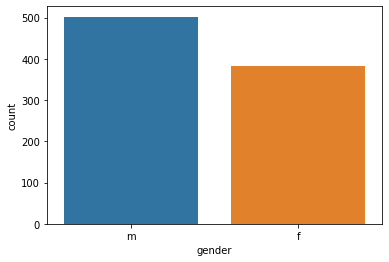

In [21]:
# Show the gender distribution
sns.countplot(x=lastfm_1_demo['gender'])

In [397]:
lastfm_1_demo['gender'].value_counts()

m    502
f    382
Name: gender, dtype: int64

In [398]:
502/(382 + 502)

0.5678733031674208

In [399]:
382/(382 + 502)

0.4321266968325792

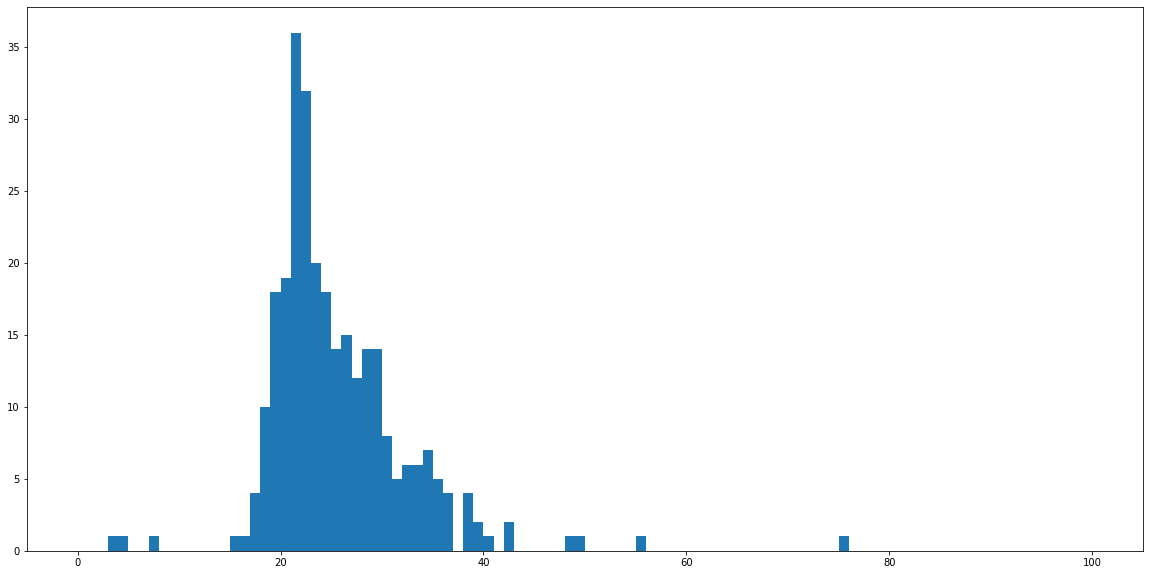

In [28]:
# Show the age distribution
plt.figure(figsize = (20,10))
plt.hist(lastfm_1_demo['age'], bins=range(0, 101))
plt.show()

In [395]:
lastfm_1_demo[(lastfm_1_demo['age'] >= 18) & (lastfm_1_demo['age'] <= 30)]

,user_id,gender,age,country,signup
2,3,m,22.0,United States,2005-10-30
5,6,NaN,24.0,Russian Federation,2006-05-18
7,8,m,23.0,Slovakia,2006-09-28
8,9,f,19.0,United States,2007-01-13
9,10,m,19.0,Poland,2006-05-04
...,...,...,...,...,...
357,360,NaN,22.0,Sweden,2005-03-10
358,361,f,26.0,Poland,2007-01-16
361,364,f,29.0,Norway,2006-03-16
362,366,m,24.0,Finland,2004-12-12


In [387]:
lastfm_1_demo.describe(include='all')

/Users/pierre/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,gender,age,country,signup
count,992.000000,884,286.000000,907,984
unique,NaN,2,NaN,66,625
top,NaN,m,NaN,United States,2005-12-06 00:00:00
freq,NaN,502,NaN,228,6
first,NaN,NaN,NaN,NaN,2002-10-29 00:00:00
last,NaN,NaN,NaN,NaN,2009-11-05 00:00:00
mean,500.554435,NaN,25.367133,NaN,NaN
std,289.316253,NaN,8.314952,NaN,NaN
min,1.000000,NaN,3.000000,NaN,NaN
25%,248.750000,NaN,21.000000,NaN,NaN


In [396]:
230/286

0.8041958041958042

In [388]:
286/992

0.28830645161290325

In [389]:
884/992

0.8911290322580645

In [390]:
907/992

0.9143145161290323

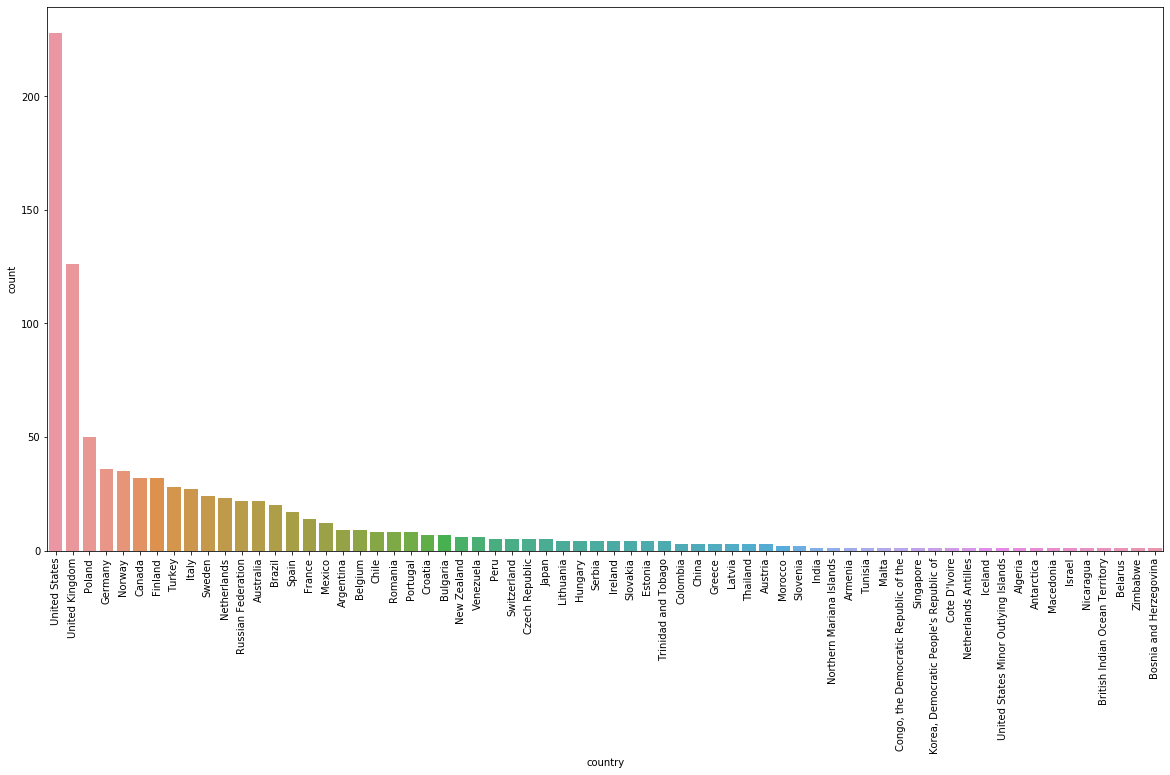

In [36]:
# Show the country distribution
plt.figure(figsize = (20,10))
sns.countplot(x=lastfm_1_demo['country'], order = lastfm_1_demo['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [403]:
lastfm_1_demo['country'].value_counts()[:20].keys()

Index(['United States', 'United Kingdom', 'Poland', 'Germany', 'Norway',
       'Canada', 'Finland', 'Turkey', 'Italy', 'Sweden', 'Netherlands',
       'Russian Federation', 'Australia', 'Brazil', 'Spain', 'France',
       'Mexico', 'Argentina', 'Belgium', 'Chile'],
      dtype='object')

In [400]:
sum(lastfm_1_demo['country'].value_counts().values[:20]) / 907

0.8533627342888643

In [401]:
lastfm_1_demo['country'].value_counts()[0] / 907

0.2513781697905182

In [46]:
user_to_artist_count = lastfm_1_behav[['user_id', 'artist_id']].groupby(['user_id', 'artist_id'], as_index=False).size()

In [45]:
user_to_artist_count.groupby('user_id')

user_id  artist_id                           
1        00c73a38-a449-4990-86ca-5088dde1b8df      2
         012a77c9-c897-494f-87d0-0a730996494d      1
         014ba96b-b8da-49e3-8a2b-b720ae42e84c      3
         01ce7548-dab4-4ca6-8dfc-8e2e4b50d461      4
         03282c56-8a24-42f4-8bfc-96188933aefa      4
                                                ... 
1000     ff3e120c-c929-4ad4-bbbd-04d1689ffc54      1
         ff6e677f-91dd-4986-a174-8db0474b1799     42
         ff9deaae-da4f-42b7-a19e-36fedd3fc706      2
         ffb18e19-64a4-4a65-b4ce-979e00c3c69d    137
         ffe02aed-ef7e-4736-a186-c2f1dd55ce8d      1
Length: 819470, dtype: int64

# Exploratoy data analysis for dataset 360k 

### 1. Visualize each demographic features individually

In [53]:
lastfm_360_demo.head()

,user_email,gender,age,country,signup
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,2007-02-01
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,2007-12-04
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,2006-09-01
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,2008-04-28
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,2006-01-27


In [407]:
demo_desc = lastfm_360_demo.describe(include='all')
demo_desc

/Users/pierre/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_email,gender,age,country,signup
count,359347,326572,284447.000000,359347,359347
unique,359347,2,NaN,239,2298
top,5bf89312e3c23ddb2876a01546ac9e645f9d8eba,m,NaN,United States,2008-01-24 00:00:00
freq,1,241642,NaN,67044,569
first,NaN,NaN,NaN,NaN,2002-10-29 00:00:00
last,NaN,NaN,NaN,NaN,2009-11-11 00:00:00
mean,NaN,NaN,25.098046,NaN,NaN
std,NaN,NaN,21.665742,NaN,NaN
min,NaN,NaN,-1337.000000,NaN,NaN
25%,NaN,NaN,20.000000,NaN,NaN


In [409]:
# Percentage of age values
demo_desc.loc['count', 'age'] / demo_desc.loc['count', 'user_email']

0.7915663689970975

In [410]:
# Percentage of gender values
demo_desc.loc['count', 'gender'] / demo_desc.loc['count', 'user_email']

0.9087928937767673

In [411]:
# Percentage of country values
demo_desc.loc['count', 'country'] / demo_desc.loc['count', 'user_email']

1.0

In [423]:
male_prop = lastfm_360_demo['gender'].value_counts()['m']/ sum(lastfm_360_demo['gender'].value_counts())
print(f"Male proportion : {male_prop}")

Male proportion : 0.7399348382592507


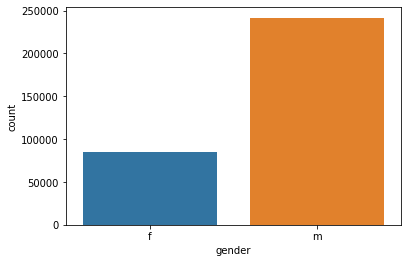

In [51]:
# Show the gender distribution
sns.countplot(x=lastfm_360_demo['gender'])
# We can observe that the feature is havily unbalanced (much more males). 

In [404]:
lastfm_360_behav

,user_email,artist_id,artist_name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
...,...,...,...,...
17535650,"sep 20, 2008",7ffd711a-b34d-4739-8aab-25e045c246da,turbostaat,12
17535651,"sep 20, 2008",9201190d-409f-426b-9339-9bd7492443e2,cuba missouri,11
17535652,"sep 20, 2008",e7cf7ff9-ed2f-4315-aca8-bcbd3b2bfa71,little man tate,11
17535653,"sep 20, 2008",f6f2326f-6b25-4170-b89d-e235b25508e8,sigur rós,10


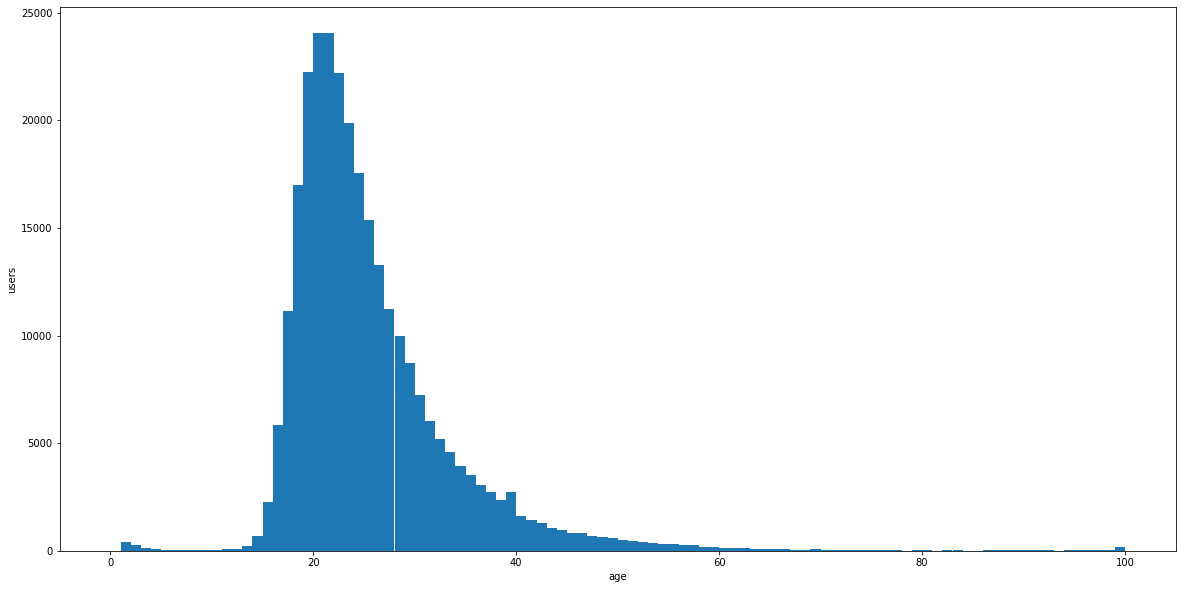

In [805]:
# Show the age distribution
plt.figure(figsize = (20,10))
plt.hist(lastfm_360_demo['age'], bins=range(0, 101))
plt.xlabel('age')
plt.ylabel('users')
plt.show()

In [436]:
lastfm_360_demo.loc[lastfm_360_demo['age'] == 0, 'age'] = np.nan

In [437]:
lastfm_360_demo.loc[lastfm_360_demo['age'] > 100, 'age'] = np.nan

In [457]:
lastfm_360_demo['age'].dropna()

0         22.0
3         19.0
4         28.0
5         20.0
6         17.0
          ... 
359342    25.0
359343    25.0
359344    20.0
359345    20.0
359346    21.0
Name: age, Length: 283309, dtype: float64

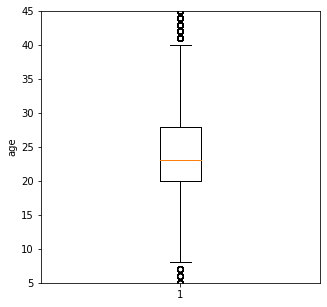

In [806]:
plt.figure(figsize=(5, 5))
plt.boxplot(lastfm_360_demo['age'].dropna())
plt.yticks(np.arange(0, 45 + 1, 5))
plt.ylim(5, 45)
#plt.title("Age distribution")
plt.ylabel('age')
plt.show()

In [479]:
np.percentile(lastfm_360_demo['age'].dropna(), [1, 25, 50, 75, 95])

array([15., 20., 23., 28., 40.])

In [198]:
# Show the country distribution of the 50 country with most users
first_20_countries = lastfm_360_demo['country'].value_counts()[:20].index

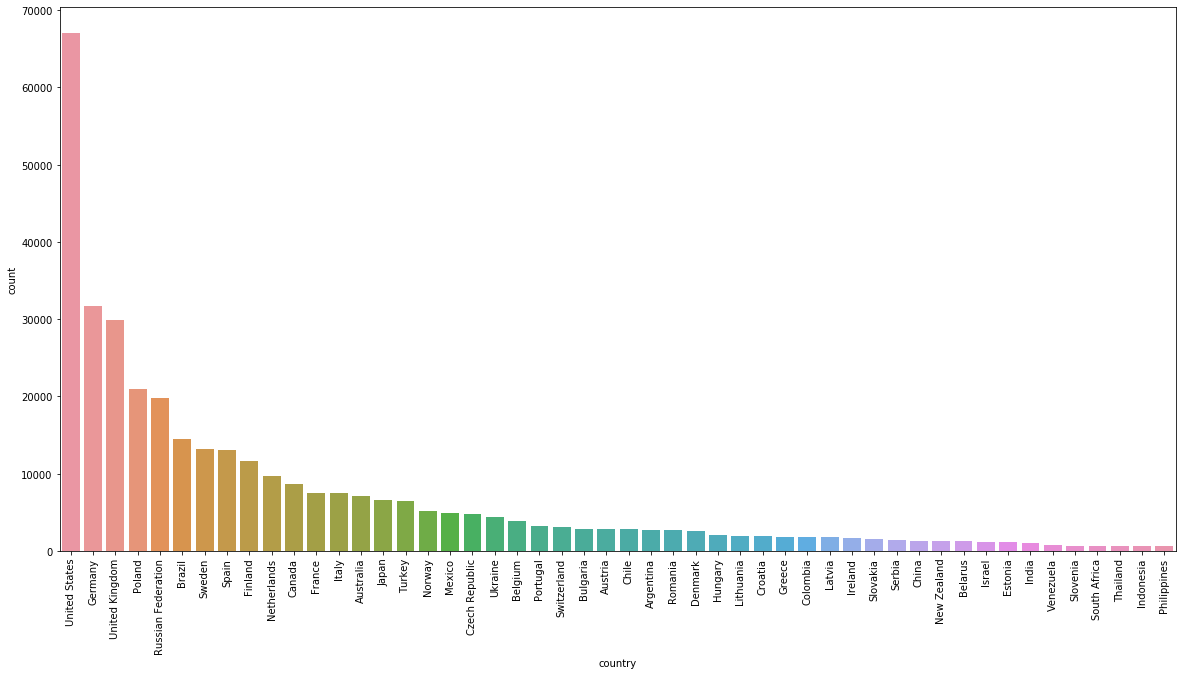

In [63]:
# Show the country distribution of the 50 country with most users
plt.figure(figsize = (20,10))
sns.countplot(x=lastfm_360_demo['country'], order = lastfm_360_demo['country'].value_counts().iloc[:50].index)
plt.xticks(rotation=90)
plt.show()

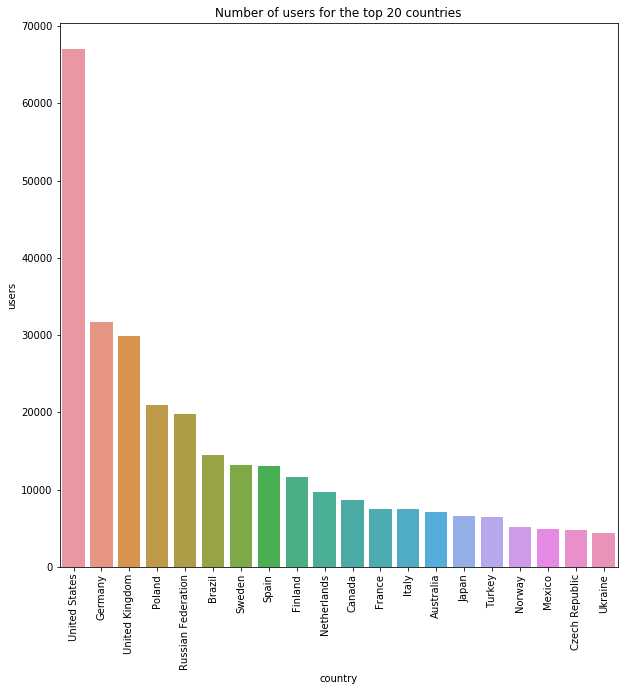

In [807]:
# Show the country distribution of the 20 country with most users
plt.figure(figsize = (10,10))
sns.countplot(x=lastfm_360_demo['country'], order = lastfm_360_demo['country'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.ylabel('users')
plt.title("Number of users for the top 20 countries")
plt.show()

In [492]:
# Number of countries
len(lastfm_360_demo['country'].value_counts())

239

In [496]:
# Total country entries
total_countries = sum(lastfm_360_demo['country'].value_counts())
total_countries

359347

In [486]:
# Top 20 country names
top20_countries = list(lastfm_360_demo['country'].value_counts()[:20].index)
top20_countries

Index(['United States', 'Germany', 'United Kingdom', 'Poland',
       'Russian Federation', 'Brazil', 'Sweden', 'Spain', 'Finland',
       'Netherlands', 'Canada', 'France', 'Italy', 'Australia', 'Japan',
       'Turkey', 'Norway', 'Mexico', 'Czech Republic', 'Ukraine'],
      dtype='object')

In [489]:
# Proportion of values in top 20 countries
sum(lastfm_360_demo['country'].value_counts()[:20].values) / total_countries

0.8194558462989812

In [ ]:
# We are now going to study the the prefered artists per country, and per age. 

In [77]:
lastfm_360_demo.dtypes

user_email            object
gender                object
age                  float64
country               object
signup        datetime64[ns]
dtype: object

In [76]:
lastfm_360_behav.dtypes

user_email     object
artist_id      object
artist_name    object
plays           int64
dtype: object

In [634]:
artist_id_to_name = lastfm_360_behav[['artist_id', 'artist_name']].groupby('artist_id').first()

In [78]:
lastfm_360 = lastfm_360_behav.merge(lastfm_360_demo, left_on='user_email', right_on='user_email')

In [635]:
# Top 20 artist in US for males vs for female
# We take the artist popularity by nomber of users (not number of plays)
us_male_data = lastfm_360[(lastfm_360['country'] == 'United States') & (lastfm_360['gender'] == 'm') ]

In [636]:
top_us_male_artist_id = us_male_data.groupby('artist_id', as_index=False).size()\
            .sort_values('size', ascending=False)[:20]['artist_id'].values


In [637]:
top_us_male_artist = artist_id_to_name.loc[top_us_male_artist_id, :].values
top_us_male_artist

array([['the beatles'],
       ['radiohead'],
       ['death cab for cutie'],
       ['coldplay'],
       ['modest mouse'],
       ['pink floyd'],
       ['led zeppelin'],
       ['kanye west'],
       ['bob dylan'],
       ['red hot chili peppers'],
       ['nine inch nails'],
       ['sufjan stevens'],
       ['beck'],
       ['daft punk'],
       ['david bowie'],
       ['the rolling stones'],
       ['the smashing pumpkins'],
       ['the shins'],
       ['elliott smith'],
       ['the white stripes']], dtype=object)

In [113]:
us_female_data = lastfm_360[(lastfm_360['country'] == 'United States') & (lastfm_360['gender'] == 'f') ]
top_us_female_artist_id = us_female_data.groupby('artist_id', as_index=False).size()\
            .sort_values('size', ascending=False)[:20]['artist_id'].values
top_us_female_artist = artist_id_to_name.loc[top_us_female_artist_id, :].values
top_us_female_artist

array([['the beatles'],
       ['death cab for cutie'],
       ['radiohead'],
       ['coldplay'],
       ['modest mouse'],
       ['sufjan stevens'],
       ['the shins'],
       ['regina spektor'],
       ['bright eyes'],
       ['elliott smith'],
       ['fall out boy'],
       ['iron & wine'],
       ['belle and sebastian'],
       ['the decemberists'],
       ['kanye west'],
       ['the killers'],
       ['rilo kiley'],
       ['tegan and sara'],
       ['britney spears'],
       ['bob dylan']], dtype=object)

In [ ]:
# From there we can see that the gender has an impact on the preferences

In [ ]:
# Now we are going to compare by country. 

In [633]:
us_artist_id = lastfm_360[(lastfm_360['country'] == 'United States') ].groupby('artist_id', as_index=False).size()\
            .sort_values('size', ascending=False)[:20]['artist_id'].values
top_us_artist = artist_id_to_name.loc[us_artist_id, :].values
top_us_artist

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['1cc5adcd-1422-4b5c-a3cd-3ecd4f43f506'], dtype='object', name='artist_id'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [118]:
uk_artist_id = lastfm_360[(lastfm_360['country'] == 'United Kingdom')].groupby('artist_id', as_index=False).size()\
            .sort_values('size', ascending=False)[:20]['artist_id'].values
top_uk_artist = artist_id_to_name.loc[uk_artist_id, :].values
top_uk_artist

array([['radiohead'],
       ['the beatles'],
       ['kings of leon'],
       ['muse'],
       ['coldplay'],
       ['david bowie'],
       ['the killers'],
       ['bloc party'],
       ['arctic monkeys'],
       ['red hot chili peppers'],
       ['foo fighters'],
       ['bob dylan'],
       ['the smiths'],
       ['pink floyd'],
       ['the cure'],
       ['snow patrol'],
       ['sigur rós'],
       ['arcade fire'],
       ['oasis'],
       ['green day']], dtype=object)

In [163]:
ge_artist_id = lastfm_360[(lastfm_360['country'] == 'Germany')].groupby('artist_id', as_index=False).size()\
            .sort_values('size', ascending=False)[:20]['artist_id'].values
top_ge_artist = artist_id_to_name.loc[ge_artist_id, :].values
top_ge_artist

array([['die Ärzte'],
       ['coldplay'],
       ['linkin park'],
       ['red hot chili peppers'],
       ['system of a down'],
       ['rammstein'],
       ['metallica'],
       ['the beatles'],
       ['the killers'],
       ['radiohead'],
       ['die toten hosen'],
       ['beatsteaks'],
       ['billy talent'],
       ['jack johnson'],
       ['placebo'],
       ['foo fighters'],
       ['the kooks'],
       ['bloc party'],
       ['muse'],
       ['mando diao']], dtype=object)

In [199]:
top_artists_by_country = lastfm_360[lastfm_360['country'].isin(first_20_countries)].groupby(['country', 'artist_id'], as_index=False)\
            .size().sort_values(['country', 'size'], ascending=False)
top_artists_by_country

,country,artist_id,size
771066,United States,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,22186
767820,United States,a74b1b7f-71a5-4011-9441-d0b5e4122711,18835
712595,United States,0039c7ae-e1a7-4a7d-9b49-0cbc716821a6,12905
780043,United States,cc197bad-dc9c-440d-a5b5-d52ba2e14234,11963
768519,United States,a96ac800-bfcb-412a-8a63-0a98df600700,10557
...,...,...,...
30796,Australia,ffe3128d-a451-4927-98a7-66344ae04e34,1
30803,Australia,fff1a82f-ee0a-4d30-8bfb-c3847d797637,1
30804,Australia,fff59f7b-5018-49d2-a7df-6958fa3fb4c9,1
30806,Australia,fffbde49-3818-4ca5-8fca-4980d4328f4a,1


In [200]:
# Keep only the 100 first artists
top_artists_by_country = top_artists_by_country.groupby('country').head(100)

In [201]:
def handle_group_values(group):
    group['rank'] = group['size'].rank(ascending=False).astype(int)
    return group
    #print(group)

In [202]:
artists_by_country = top_artists_by_country.groupby('country').apply(lambda x : handle_group_values(x))

In [203]:
def country_rank_to_map(artist_group):
    return artist_group[['country', 'rank']].set_index('country').to_dict()['rank']

In [205]:
artists_rank = artists_by_country.groupby('artist_id').apply(lambda x: country_rank_to_map(x))
artists_rank

artist_id
00034ede-a1f1-4219-be39-02f36853373e                                       {'Brazil': 93}
00376321-ce0f-4bd7-a98f-fcabdbf06ea7                                      {'Finland': 97}
0039c7ae-e1a7-4a7d-9b49-0cbc716821a6    {'United States': 3, 'United Kingdom': 31, 'Sw...
00a9f935-ba93-4fc8-a33a-993abe9c936b    {'Ukraine': 16, 'Turkey': 92, 'Sweden': 36, 'R...
0103c1cc-4a09-4a5d-a344-56ad99a77193    {'Ukraine': 30, 'Russian Federation': 35, 'Mex...
                                                              ...                        
feaef10b-cae5-40d9-89d3-9a5cf4dec8da                                        {'Spain': 81}
ff6e677f-91dd-4986-a174-8db0474b1799    {'United States': 29, 'United Kingdom': 61, 'S...
ff7f80cd-05c2-4068-a00e-fbfbd453d049                                      {'Germany': 76}
ffa25bb8-a082-4b47-aa4c-9ef48df98dc6                                        {'Japan': 58}
ffb2d3e3-a4cc-48cf-8fb0-f2f846e9d7b9           {'Sweden': 2, 'Norway': 19, 'Finland': 89}


In [246]:
sorted_artists_rank = {artist_id_to_name.loc[k].values[0]: v for k, v in sorted(artists_rank.items(), key=lambda item: len(item[1]), reverse=True)}

In [248]:
# Show the artist per ranking in number of listeners by country

for k, v in sorted_artists_rank.items():
    print(f"Artist: {k}")
    print(f"Rankings: {v}\n")

Artist: queen
Rankings: {'United States': 45, 'United Kingdom': 22, 'Ukraine': 20, 'Turkey': 33, 'Sweden': 17, 'Spain': 10, 'Russian Federation': 29, 'Poland': 22, 'Norway': 13, 'Netherlands': 23, 'Mexico': 30, 'Japan': 23, 'Italy': 6, 'Germany': 52, 'France': 28, 'Finland': 33, 'Czech Republic': 24, 'Canada': 39, 'Brazil': 28, 'Australia': 41}

Artist: metallica
Rankings: {'United States': 56, 'United Kingdom': 37, 'Ukraine': 7, 'Turkey': 2, 'Sweden': 10, 'Spain': 13, 'Russian Federation': 9, 'Poland': 1, 'Norway': 5, 'Netherlands': 16, 'Mexico': 13, 'Japan': 65, 'Italy': 21, 'Germany': 7, 'France': 15, 'Finland': 1, 'Czech Republic': 13, 'Canada': 24, 'Brazil': 10, 'Australia': 18}

Artist: pink floyd
Rankings: {'United States': 9, 'United Kingdom': 14, 'Ukraine': 14, 'Turkey': 6, 'Sweden': 30, 'Spain': 36, 'Russian Federation': 12, 'Poland': 15, 'Norway': 6, 'Netherlands': 13, 'Mexico': 7, 'Japan': 42, 'Italy': 4, 'Germany': 52, 'France': 6, 'Finland': 26, 'Czech Republic': 9, 'Cana

We observe that even though the most famous artists tends to end up more often at the top, there is a good diversity between countries

In [249]:
pd.DataFrame(sorted_artists_rank)

,queen,metallica,pink floyd,nirvana,red hot chili peppers,muse,radiohead,the beatles,coldplay,linkin park,...,fleet foxes,three days grace,maximum the hormone,support lesbiens,clint mansell,prefuse 73,myslovitz,iván ferreiro,schandmaul,bonnie pink
United States,45,56,9,47,10,22,2,1,4,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,22,37,14,47,10,4,1,2,5,27,...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ukraine,20,7,14,25,10,2,1,11,9,6,...,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Turkey,33,2,6,55,24,14,1,18,8,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sweden,17,10,30,51,14,19,11,3,1,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,10,13,36,39,15,4,2,5,1,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN,NaN
Russian Federation,29,9,12,19,8,4,1,3,11,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Poland,22,1,15,35,3,30,12,18,6,8,...,NaN,NaN,NaN,NaN,97.0,NaN,2.0,NaN,NaN,NaN
Norway,13,5,6,39,11,4,3,2,1,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Netherlands,23,16,13,43,4,5,3,2,1,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
lastfm_360[(lastfm_360['age'] >= age_bounds[0]) & (lastfm_360['age'] < age_bounds[0 + 1])]

,user_email,artist_id,artist_name,plays,gender,age,country,signup
146,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,c14b4180-dc87-481e-b17a-64e4150f90f6,opeth,106,m,19.0,Mexico,2008-04-28
147,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,af8e4cc5-ef54-458d-a194-7b210acf638f,cannibal corpse,48,m,19.0,Mexico,2008-04-28
148,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,eaaee2c2-0851-43a2-84c8-0198135bc3a8,elis,31,m,19.0,Mexico,2008-04-28
149,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,d3ff3c70-c897-433d-899c-b838670fcb12,amoral,29,m,19.0,Mexico,2008-04-28
150,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,5b687684-ad34-4a9f-b425-0e7aa81fbd38,amon amarth,26,m,19.0,Mexico,2008-04-28
...,...,...,...,...,...,...,...,...
17535290,fffe3e8eb1b2db8dcb3f3fe753552d5803d085f1,42555956-bf57-4240-aadf-b58e6762932c,guillemots,58,f,19.0,United Kingdom,2007-06-04
17535291,fffe3e8eb1b2db8dcb3f3fe753552d5803d085f1,83e72d2b-501e-4715-9bdf-8e6ffca42881,tom vek,57,f,19.0,United Kingdom,2007-06-04
17535292,fffe3e8eb1b2db8dcb3f3fe753552d5803d085f1,2d67239c-aa40-4ad5-a807-9052b66857a6,le tigre,51,f,19.0,United Kingdom,2007-06-04
17535293,fffe3e8eb1b2db8dcb3f3fe753552d5803d085f1,8a396a9c-2e4f-47e2-a587-c26e93a0953f,the go! team,50,f,19.0,United Kingdom,2007-06-04


In [264]:
for i in range(len(age_bounds) - 1):
    # Take the top 20 artists given an certain age 5 years chunk in the data
    age_chunk_artist_ids = lastfm_360[(lastfm_360['age'] >= age_bounds[i]) 
                                      & (lastfm_360['age'] < age_bounds[i + 1])]\
                        .groupby('artist_id', as_index=False).size()\
                        .sort_values('size', ascending=False)[:20]['artist_id'].values
    top_age_chunk_artist = artist_id_to_name.loc[age_chunk_artist_ids, :].values
    
    print(f'Top 20 artists for {age_bounds[i]} to {age_bounds[i + 1]} years old: {top_age_chunk_artist}')

Top 20 artists for 15 to 20 years old: [['coldplay']
 ['linkin park']
 ['the beatles']
 ['red hot chili peppers']
 ['system of a down']
 ['muse']
 ['metallica']
 ['radiohead']
 ['the killers']
 ['blink-182']
 ['arctic monkeys']
 ['paramore']
 ['green day']
 ['fall out boy']
 ['nirvana']
 ['pink floyd']
 ['kanye west']
 ['placebo']
 ['slipknot']
 ['the offspring']]
Top 20 artists for 20 to 25 years old: [['radiohead']
 ['the beatles']
 ['coldplay']
 ['red hot chili peppers']
 ['muse']
 ['metallica']
 ['linkin park']
 ['pink floyd']
 ['the killers']
 ['system of a down']
 ['daft punk']
 ['placebo']
 ['death cab for cutie']
 ['arctic monkeys']
 ['sigur rós']
 ['queen']
 ['led zeppelin']
 ['rammstein']
 ['foo fighters']
 ['nirvana']]
Top 20 artists for 25 to 30 years old: [['radiohead']
 ['the beatles']
 ['coldplay']
 ['muse']
 ['metallica']
 ['pink floyd']
 ['the killers']
 ['red hot chili peppers']
 ['depeche mode']
 ['portishead']
 ['massive attack']
 ['nine inch nails']
 ['the smashing

We can see that the age also affect the artist preference which is not suprising. 
Nevertheless, the artist the most famous tends to remain the same

In [215]:
# 

for i in range(len(age_bounds) - 1):
    
    age_chunk_artist_id = lastfm_360[(lastfm_360['age'] >= 15) & (lastfm_360['age'] < 20)].groupby('artist_id', as_index=False).size()\
            .sort_values('size', ascending=False)[:20]['artist_id'].values
    top_age_15_20_artist = artist_id_to_name.loc[age_15_20_artist_id, :].values
    print(f'Top 20 for 15years to 20years old: {top_age_15_20_artist}')


age_15_20_artist_id = lastfm_360[(lastfm_360['age'] >= 15) & (lastfm_360['age'] < 20)].groupby('artist_id', as_index=False).size()\
            .sort_values('size', ascending=False)[:20]['artist_id'].values
top_age_15_20_artist = artist_id_to_name.loc[age_15_20_artist_id, :].values
print(f'Top 20 for 15years to 20years old: {top_age_15_20_artist}')



Top 20 for 15years to 20years old: [['coldplay']
 ['linkin park']
 ['the beatles']
 ['red hot chili peppers']
 ['system of a down']
 ['muse']
 ['metallica']
 ['radiohead']
 ['the killers']
 ['blink-182']
 ['arctic monkeys']
 ['paramore']
 ['green day']
 ['fall out boy']
 ['nirvana']
 ['pink floyd']
 ['kanye west']
 ['placebo']
 ['slipknot']
 ['the offspring']]


In [218]:

age_bounds

[15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

In [ ]:
plt.countplot()

In [208]:
artists_rank.values[10].plot()

AttributeError: 'dict' object has no attribute 'plot'

In [ ]:
# We can also observe big changes within country, even from with the same language (UK, US, Canada).

In [ ]:
lastfm_360_demo['age'].plot()

In [ ]:
lastfm_360_demo['country'].value_counts.plot()

In [ ]:
### 2. Visualize de most viewed artists. 

### 3. Visualize each demographic features against the 20 most listened artists per user. 

In [276]:
best_100_users = lastfm_360_behav['user_email'].value_counts().index[:100]
best_100_users

Index(['13c0df8a58cd3ca9e37d8e90662d2ad3c062eaa5',
       '2040b3d3cb47caace19e728090a88d6b1087aa8e',
       '52bf0682648b44e6cc27ebe512dd4fa3455a11c2',
       '7679da839e1a6c2d299c7fd6834fb9bf6e229224',
       '8d8643cded0ac18e66a3c5a2b74de21fbca0e6b7',
       '0a7c493718902fe4590cad2f76db9abb6dce6fae',
       'ce52b233f731dda7325aae6242440bd2a7095fca',
       'e710c9f69c2d07f914e7b1fa533b3e9f27890d62',
       '209b31e32790bdaa80e76ce9bb97e13e3980e1a5',
       'a0e128cc755f7a2d4404f0c2cb6a573d5c68f224',
       'e85a4c61ca10501e09c979d411e984afc0a2393e',
       '544719ea0ba39d378d2961453efcd8d57d54e616',
       '7075b80254d6280a46486fde3f224d66e06def12',
       '5a07ab9831351b7658540a914ab56820168046ae',
       '45d990ea5813d9d7280be38e516eef43ce46e7fa',
       'c79fe89cc6c1bdc52a8f4dd350a31f5ac87828db',
       '317d6010df721448103070d97a75b84164f3730d',
       'd483a856b7c113081d16ef48c9236f7957415059',
       'cf7099ce5c5037f5cd7aef2770144219518e39bc',
       'b4609162c3772ea49a89ecd

In [277]:
best_100_all = lastfm_360[lastfm_360['user_email'].isin(best_100_users)]

In [361]:
def compute_user_rank(group):
    group['rank'] = group['plays'].rank(ascending=False).astype(int)
    return group.head(20)[['user_email', 'artist_name']]
    #print(group)

In [362]:
best_20_artist_per_user = best_100_all.groupby('user_email', as_index=False).apply(lambda x : compute_user_rank(x))

In [366]:
best_20_artist_per_user.groupby('user_email')['artist_name'].apply(list).items()

In [368]:
for email, artist_list in best_20_artist_per_user.groupby('user_email')['artist_name'].apply(list).items():
    print(f"Email: {email}")
    print(f"Artist list: {artist_list}")

Email: 03e5179fca5c4f8fe6cefd95822a24610c830fdd
Artist list: ['bloc party', 'radiohead', 'the mars volta', 'at the drive-in', 'misfits', 'the smiths', 'sonic youth', 'my bloody valentine', 'queens of the stone age', '7 seconds', 'animal collective', 'men eater', 'the beatles', 'ornatos violeta', 'the clash', 'el grupo nuevo de omar rodriguez lopez', 'tool', 'tv on the radio', 'the doors', 'pink floyd']
Email: 068df829fbace5b058771bb42f477ce858fa675c
Artist list: ['extortion labs', 'midnight juggernauts', 'moderat', 'burial', 'placebo', 'your infamous harp', 'neon neon', 'mylo', 'cassius', 'gorillaz', 'jay-z', 'superfunk', 'atomic hooligan', 'mistabishi', 'kaiser chiefs', 'peter doherty', 'sasha', 'scsi-9', 'blood red shoes', 'josh gabriel']
Email: 0701715a7c6c6bc35036ad5fa7d89ddfe6691c95
Artist list: ['butterfly boucher', 'florence + the machine', 'milla', 'the hot toddies', 'dragonette', 'jesca hoop', 'noisettes', 'tilly and the wall', 'wallspace', 'all girl summer fun band', 'amanda 

We can observe than those users have diverse tastes. 

In [497]:
# We are going to generated the 100 artists with most 
# listeners for different demographic groups to get an idea of the influence of the demographic features.

# We use kendalltau as a measure of similarity between the rankings
# - Wikipedia: https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient
# - Scipy: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html



In [507]:
import scipy

print(scipy.stats.kendalltau(top_ge_artist, top_uk_artist))
print(scipy.stats.kendalltau(top_us_artist, top_uk_artist))
print(scipy.stats.kendalltau(top_us_male_artist, top_us_female_artist))

KendalltauResult(correlation=-0.16842105263157894, pvalue=0.3188964804719496)
KendalltauResult(correlation=-0.031578947368421054, pvalue=0.8728414598639419)
KendalltauResult(correlation=0.23157894736842105, pvalue=0.1649764063636054)


In [517]:
top_100_artists_per_country_list = top_artists_by_country.groupby('country')['artist_id'].apply(list)

In [640]:
top_100_artists_per_country_list

country
Australia             [a74b1b7f-71a5-4011-9441-d0b5e4122711, b10bbbf...
Brazil                [b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d, cc197ba...
Canada                [a74b1b7f-71a5-4011-9441-d0b5e4122711, b10bbbf...
Czech Republic        [cc197bad-dc9c-440d-a5b5-d52ba2e14234, cc0b708...
Finland               [65f4f0c5-ef9e-490c-aee3-909e7ae6b2ab, 00a9f93...
France                [a74b1b7f-71a5-4011-9441-d0b5e4122711, b10bbbf...
Germany               [f2fb0ff0-5679-42ec-a55c-15109ce6e320, cc197ba...
Italy                 [a74b1b7f-71a5-4011-9441-d0b5e4122711, 204db5a...
Japan                 [b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d, a74b1b7...
Mexico                [a74b1b7f-71a5-4011-9441-d0b5e4122711, b10bbbf...
Netherlands           [cc197bad-dc9c-440d-a5b5-d52ba2e14234, b10bbbf...
Norway                [cc197bad-dc9c-440d-a5b5-d52ba2e14234, b10bbbf...
Poland                [65f4f0c5-ef9e-490c-aee3-909e7ae6b2ab, fccef2c...
Russian Federation    [a74b1b7f-71a5-4011-9441-d0b5e4122

In [738]:
corr_matrix = []
for i in top_100_artists_per_country_list.index:
    corr_matrix_row = []
    for j in top_100_artists_per_country_list.index:
        corr = scipy.stats.kendalltau(top_100_artists_per_country_list[i][:20], top_100_artists_per_country_list[j][:20]).correlation
        corr_matrix_row.append(corr)
    corr_matrix.append(corr_matrix_row)

In [739]:
import seaborn as sn
import matplotlib.pyplot as plt

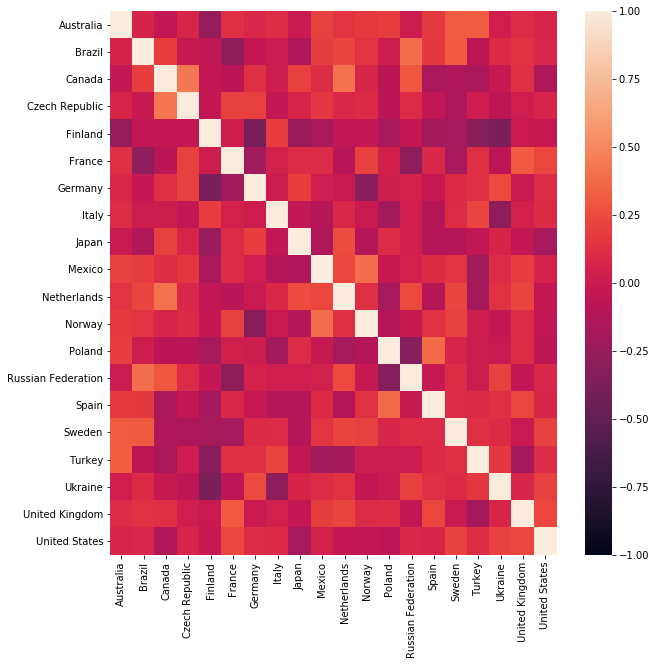

In [740]:
ticks = list(top_100_artists_per_country_list.index)
plt.figure(figsize=(10, 10))
sn.heatmap(corr_matrix, vmin=-1, vmax=1, xticklabels=ticks, yticklabels=ticks )
plt.show()

In [648]:
artist_id_to_name.loc[top_100_artists_per_country_list['Spain'][:10], :]

,artist_name
artist_id,
cc197bad-dc9c-440d-a5b5-d52ba2e14234,coldplay
a74b1b7f-71a5-4011-9441-d0b5e4122711,radiohead
95e1ead9-4d31-4808-a7ac-32c3614c116b,the killers
9c9f1380-2516-4fc9-a3e6-f9f61941d090,muse
b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,the beatles
aa7a2827-f74b-473c-bd79-03d065835cf7,franz ferdinand
f59163ba-1a7a-4349-b0fd-fb9582ebe333,extremoduro
dfe9a7c4-8cf2-47f4-9dcb-d233c2b86ec3,amy winehouse
a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432,u2


In [655]:
spain_top_10 = artist_id_to_name.loc[top_100_artists_per_country_list['United States'][:10], :].values
uk_top_10 = artist_id_to_name.loc[top_100_artists_per_country_list['United Kingdom'][:10], :].values
us_top_10 = artist_id_to_name.loc[top_100_artists_per_country_list['United States'][:10], :].values
au_top_10 = artist_id_to_name.loc[top_100_artists_per_country_list['Australia'][:10], :].values

In [656]:
print(f"US: {us_top_10}")
print(f"UK: {uk_top_10}")

US: [['the beatles']
 ['radiohead']
 ['death cab for cutie']
 ['coldplay']
 ['modest mouse']
 ['sufjan stevens']
 ['kanye west']
 ['bob dylan']
 ['pink floyd']
 ['red hot chili peppers']]
UK: [['radiohead']
 ['the beatles']
 ['kings of leon']
 ['muse']
 ['coldplay']
 ['david bowie']
 ['the killers']
 ['bloc party']
 ['arctic monkeys']
 ['red hot chili peppers']]


In [657]:
scipy.stats.kendalltau(uk_top_10, us_top_10)

KendalltauResult(correlation=0.1111111111111111, pvalue=0.7274895282186948)

In [654]:
uk_top_10 = artist_id_to_name.loc[top_100_artists_per_country_list['United Kingdom'][:10], :]

In [ ]:
us_top_10 = artist_id_to_name.loc[top_100_artists_per_country_list['United States'][:10], :]

In [649]:
artist_id_to_name.loc[top_100_artists_per_country_list['Australia'][:10], :]

,artist_name
artist_id,
a74b1b7f-71a5-4011-9441-d0b5e4122711,radiohead
b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,the beatles
cc197bad-dc9c-440d-a5b5-d52ba2e14234,coldplay
9c9f1380-2516-4fc9-a3e6-f9f61941d090,muse
6ffb8ea9-2370-44d8-b678-e9237bbd347b,kings of leon
8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers
056e4f3e-d505-4dad-8ec1-d04f521cbb56,daft punk
95e1ead9-4d31-4808-a7ac-32c3614c116b,the killers
8c538f11-c141-4588-8ecb-931083524186,bloc party


In [616]:
m_data = lastfm_360[lastfm_360['gender'] == 'm']
f_data = lastfm_360[lastfm_360['gender'] == 'f']

In [664]:
m_data_top_100_id = lastfm_360[lastfm_360['gender'] == 'm'].groupby('artist_id', as_index=False)\
                        .size()\
                        .sort_values('size', ascending=False)[:100]['artist_id'].values
m_data_top_100_name = artist_id_to_name.loc[m_data_top_100_id, :].values

f_data_top_100_id = lastfm_360[lastfm_360['gender'] == 'f'].groupby('artist_id', as_index=False)\
                        .size()\
                        .sort_values('size', ascending=False)[:100]['artist_id'].values
f_data_top_100_name = artist_id_to_name.loc[f_data_top_100_id, :].values

In [675]:
corr_top_5 = scipy.stats.kendalltau(m_data_top_100_name[:5], f_data_top_100_name[:5]).correlation
corr_top_10 = scipy.stats.kendalltau(m_data_top_100_name[:10], f_data_top_100_name[:10]).correlation
corr_top_20 = scipy.stats.kendalltau(m_data_top_100_name[:20], f_data_top_100_name[:20]).correlation
corr_top_50 = scipy.stats.kendalltau(m_data_top_100_name[:50], f_data_top_100_name[:50]).correlation
corr_top_100 = scipy.stats.kendalltau(m_data_top_100_name, f_data_top_100_name).correlation
print(f"Male vs Female Kendall tau correlation :\n- Top 5: {corr_top_5}"
      + f"\n- Top 10: {corr_top_10}\n- Top 20: {corr_top_20}"
      + f"\n- Top 50: {corr_top_50}\n- Top 100: {corr_top_100}")

Male vs Female Kendall tau correlation :
- Top 5: 0.0
- Top 10: 0.3333333333333333
- Top 20: 0.17894736842105263
- Top 50: -0.04
- Top 100: -0.06828282828282829


In [682]:
zip(m_data_top_100_name[:10], f_data_top_100_name[:10])

AttributeError: 'zip' object has no attribute 'values'

In [741]:
top_20_mf_data=zip(m_data_top_100_name[:20], f_data_top_100_name[:20])
top_20_gender = pd.DataFrame(index=range(1, 21), 
                             data=[(i[0], j[0]) for i, j in top_20_mf_data], 
                             columns=['male', 'female'])
top_20_gender

,male,female
1,radiohead,the beatles
2,the beatles,coldplay
3,coldplay,radiohead
4,metallica,muse
5,red hot chili peppers,the killers
6,pink floyd,placebo
7,muse,death cab for cutie
8,linkin park,amy winehouse
9,system of a down,red hot chili peppers
10,the killers,the cure


In [744]:
# Add age chunk to dataframe
for i in range(len(age_bounds) - 1):
    # Take the top 20 artists given an certain age 5 years chunk in the data
    age_chunk_artist_ids = lastfm_360[(lastfm_360['age'] >= age_bounds[i]) 
                                      & (lastfm_360['age'] < age_bounds[i + 1])]\
                        .groupby('artist_id', as_index=False).size()\
                        .sort_values('size', ascending=False)[:20]['artist_id'].values
    top_age_chunk_artist = artist_id_to_name.loc[age_chunk_artist_ids, :].values
    clean_top_age_chunk = [i[0] for i in top_age_chunk_artist]
    top_20_gender[f'{age_bounds[i]}_to_{age_bounds[i + 1]}_years'] = clean_top_age_chunk
    print(f'Top 20 artists for {age_bounds[i]} to {age_bounds[i + 1]} years old: {clean_top_age_chunk}')

Top 20 artists for 15 to 20 years old: ['coldplay', 'linkin park', 'the beatles', 'red hot chili peppers', 'system of a down', 'muse', 'metallica', 'radiohead', 'the killers', 'blink-182', 'arctic monkeys', 'paramore', 'green day', 'fall out boy', 'nirvana', 'pink floyd', 'kanye west', 'placebo', 'slipknot', 'the offspring']
Top 20 artists for 20 to 25 years old: ['radiohead', 'the beatles', 'coldplay', 'red hot chili peppers', 'muse', 'metallica', 'linkin park', 'pink floyd', 'the killers', 'system of a down', 'daft punk', 'placebo', 'death cab for cutie', 'arctic monkeys', 'sigur rós', 'queen', 'led zeppelin', 'rammstein', 'foo fighters', 'nirvana']
Top 20 artists for 25 to 30 years old: ['radiohead', 'the beatles', 'coldplay', 'muse', 'metallica', 'pink floyd', 'the killers', 'red hot chili peppers', 'depeche mode', 'portishead', 'massive attack', 'nine inch nails', 'the smashing pumpkins', 'björk', 'daft punk', 'david bowie', 'the cure', 'queen', 'air', 'sigur rós']
Top 20 artists 

In [745]:
top_20_gender[['15_to_20_years' ,'20_to_25_years', '25_to_30_years','30_to_35_years', '35_to_40_years', 
               '40_to_45_years','45_to_50_years','50_to_55_years','55_to_60_years']]

,15_to_20_years,20_to_25_years,25_to_30_years,30_to_35_years,35_to_40_years,40_to_45_years,45_to_50_years,50_to_55_years,55_to_60_years
1,coldplay,radiohead,radiohead,radiohead,the beatles,the beatles,the beatles,the beatles,the beatles
2,linkin park,the beatles,the beatles,the beatles,radiohead,u2,pink floyd,the rolling stones,the rolling stones
3,the beatles,coldplay,coldplay,coldplay,u2,pink floyd,the rolling stones,pink floyd,bob dylan
4,red hot chili peppers,red hot chili peppers,muse,depeche mode,depeche mode,david bowie,david bowie,bob dylan,eric clapton
5,system of a down,muse,metallica,u2,the cure,radiohead,bob dylan,david bowie,simon & garfunkel
6,muse,metallica,pink floyd,the cure,coldplay,coldplay,u2,led zeppelin,neil young
7,metallica,linkin park,the killers,pink floyd,david bowie,depeche mode,queen,eric clapton,pink floyd
8,radiohead,pink floyd,red hot chili peppers,david bowie,pink floyd,the rolling stones,led zeppelin,the who,fleetwood mac
9,the killers,the killers,depeche mode,portishead,the rolling stones,the cure,coldplay,queen,the who
10,blink-182,system of a down,portishead,metallica,r.e.m.,queen,radiohead,neil young,van morrison


In [727]:
top_20_gender.columns

['30_to_35_years',
 '25_to_30_years',
 '55_to_60_years',
 '20_to_25_years',
 '35_to_40_years',
 '50_to_55_years',
 '15_to_20_years',
 '45_to_50_years',
 '40_to_45_years']

In [729]:
age_list = [i for i in top_20_gender.columns if i not in ['male', 'female']]

In [730]:
age_corr_matrix = []
for i in age_list:
    age_corr_matrix_row = []
    for j in age_list:
        corr = scipy.stats.kendalltau(top_20_gender[i].values, top_20_gender[j].values).correlation
        age_corr_matrix_row.append(corr)
    age_corr_matrix.append(age_corr_matrix_row)

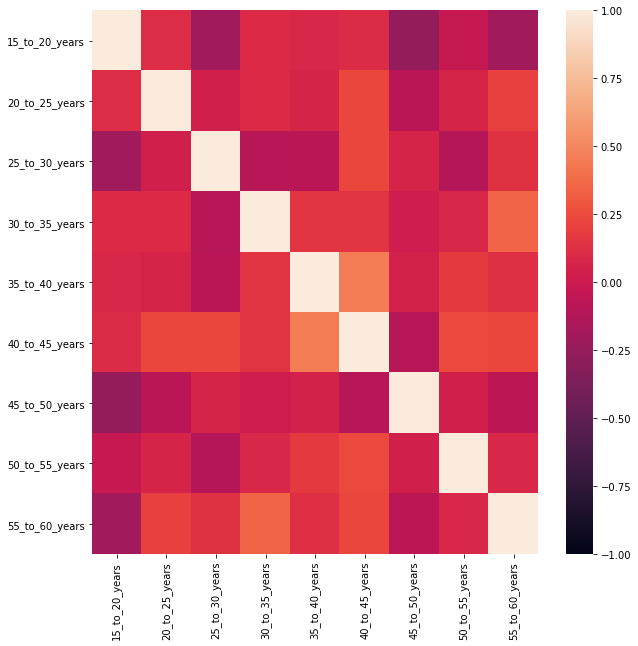

In [731]:
ticks = list(age_list)
plt.figure(figsize=(10, 10))
sn.heatmap(age_corr_matrix, vmin=-1, vmax=1, xticklabels=ticks, yticklabels=ticks )
plt.show()

In [799]:
pd.DataFrame(index=range(1, 101), 
             columns = top_100_artists_per_country_list.index, 
             data=np.vectorize(convert_to_name)(top_100_country_20))

country,Australia,Brazil,Canada,Czech Republic,Finland,France,Germany,Italy,Japan,Mexico,Netherlands,Norway,Poland,Russian Federation,Spain,Sweden,Turkey,Ukraine,United Kingdom,United States
1,radiohead,the beatles,radiohead,coldplay,metallica,radiohead,die Ärzte,radiohead,the beatles,radiohead,coldplay,coldplay,metallica,radiohead,coldplay,coldplay,radiohead,radiohead,radiohead,the beatles
2,the beatles,coldplay,the beatles,system of a down,nightwish,the beatles,coldplay,fabrizio de andré,radiohead,the beatles,the beatles,the beatles,myslovitz,placebo,radiohead,kent,metallica,muse,the beatles,radiohead
3,coldplay,amy winehouse,coldplay,the beatles,in flames,daft punk,linkin park,the beatles,perfume,café tacuba,radiohead,radiohead,red hot chili peppers,the beatles,the killers,the beatles,duman,depeche mode,kings of leon,death cab for cutie
4,muse,radiohead,death cab for cutie,nightwish,system of a down,muse,red hot chili peppers,pink floyd,くるり,coldplay,red hot chili peppers,muse,o.s.t.r.,muse,muse,johnny cash,sezen aksu,placebo,muse,coldplay
5,kings of leon,los hermanos,pink floyd,radiohead,apulanta,coldplay,system of a down,coldplay,capsule,muse,muse,metallica,system of a down,the prodigy,the beatles,håkan hellström,teoman,the prodigy,coldplay,modest mouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,evanescence,lily allen,joy division,asian dub foundation,stratovarius,eels,tenacious d,bluvertigo,franz ferdinand,avril lavigne,marco borsato,pixies,nosowska,gorillaz,la fuga,koЯn,him,deep purple,eels,talking heads
97,tegan and sara,os paralamas do sucesso,aphex twin,alanis morissette,raappana,britney spears,gorillaz,queens of the stone age,black eyed peas,michael jackson,joy division,the who,clint mansell,bonobo,mgmt,bob marley & the wailers,nouvelle vague,frank sinatra,britney spears,simon & garfunkel
98,sonic youth,the who,moby,rage against the machine,cheek,iron maiden,apocalyptica,johnny cash,acidman,beck,nine inch nails,nickelback,nickelback,65daysofstatic,nine inch nails,lily allen,iced earth,britney spears,my chemical romance,aphex twin
99,john mayer,dream theater,crystal castles,mike oldfield,the doors,dionysos,bob dylan,beck,aerosmith,the flaming lips,iron maiden,modest mouse,in flames,amy winehouse,mägo de oz,bob hund,loreena mckennitt,michael jackson,the kinks,neil young


In [794]:
top_100_country_20 = np.array([np.array(i) for i in top_100_artists_per_country_list.values]).T

In [795]:
def convert_to_name(id_:str):
    return artist_id_to_name.loc[id_, :].values[0]
    

In [801]:
top_100_country_20_df = pd.DataFrame(index=range(1, 101), 
             columns = top_100_artists_per_country_list.index, 
             data=np.vectorize(convert_to_name)(top_100_country_20))

In [804]:
top_100_country_20_df[:10]

country,Australia,Brazil,Canada,Czech Republic,Finland,France,Germany,Italy,Japan,Mexico,Netherlands,Norway,Poland,Russian Federation,Spain,Sweden,Turkey,Ukraine,United Kingdom,United States
1,radiohead,the beatles,radiohead,coldplay,metallica,radiohead,die Ärzte,radiohead,the beatles,radiohead,coldplay,coldplay,metallica,radiohead,coldplay,coldplay,radiohead,radiohead,radiohead,the beatles
2,the beatles,coldplay,the beatles,system of a down,nightwish,the beatles,coldplay,fabrizio de andré,radiohead,the beatles,the beatles,the beatles,myslovitz,placebo,radiohead,kent,metallica,muse,the beatles,radiohead
3,coldplay,amy winehouse,coldplay,the beatles,in flames,daft punk,linkin park,the beatles,perfume,café tacuba,radiohead,radiohead,red hot chili peppers,the beatles,the killers,the beatles,duman,depeche mode,kings of leon,death cab for cutie
4,muse,radiohead,death cab for cutie,nightwish,system of a down,muse,red hot chili peppers,pink floyd,くるり,coldplay,red hot chili peppers,muse,o.s.t.r.,muse,muse,johnny cash,sezen aksu,placebo,muse,coldplay
5,kings of leon,los hermanos,pink floyd,radiohead,apulanta,coldplay,system of a down,coldplay,capsule,muse,muse,metallica,system of a down,the prodigy,the beatles,håkan hellström,teoman,the prodigy,coldplay,modest mouse
6,red hot chili peppers,chico buarque,arcade fire,jaromír nohavica,cmx,pink floyd,rammstein,queen,coldplay,the killers,arctic monkeys,pink floyd,coldplay,depeche mode,franz ferdinand,the killers,pink floyd,linkin park,david bowie,sufjan stevens
7,daft punk,arctic monkeys,nine inch nails,red hot chili peppers,coldplay,red hot chili peppers,metallica,franco battiato,mr.children,pink floyd,u2,the killers,happysad,linkin park,extremoduro,lars winnerbäck,Şebnem ferah,metallica,the killers,kanye west
8,the killers,the strokes,daft punk,daniel landa,muse,portishead,the beatles,afterhours,red hot chili peppers,daft punk,daft punk,röyksopp,linkin park,red hot chili peppers,amy winehouse,bob dylan,coldplay,system of a down,bloc party,bob dylan
9,bloc party,pink floyd,red hot chili peppers,pink floyd,pmmp,serge gainsbourg,the killers,elio e le storie tese,oasis,babasónicos,the killers,johnny cash,hey,metallica,u2,in flames,pinhani,coldplay,arctic monkeys,pink floyd
10,the presets,metallica,feist,linkin park,rammstein,noir désir,radiohead,muse,aphex twin,depeche mode,jack johnson,foo fighters,kult,system of a down,queen,metallica,mor ve Ötesi,red hot chili peppers,red hot chili peppers,red hot chili peppers


In [798]:
np.vectorize(convert_to_name)(top_100_country_20)

array([['radiohead', 'the beatles', 'radiohead', ..., 'radiohead',
        'radiohead', 'the beatles'],
       ['the beatles', 'coldplay', 'the beatles', ..., 'muse',
        'the beatles', 'radiohead'],
       ['coldplay', 'amy winehouse', 'coldplay', ..., 'depeche mode',
        'kings of leon', 'death cab for cutie'],
       ...,
       ['sonic youth', 'the who', 'moby', ..., 'britney spears',
        'my chemical romance', 'aphex twin'],
       ['john mayer', 'dream theater', 'crystal castles', ...,
        'michael jackson', 'the kinks', 'neil young'],
       ['the cat empire', 'rammstein', 'city and colour', ...,
        'paul van dyk', 'stereophonics', 'rage against the machine']],
      dtype='<U28')

In [769]:
top_100_artists_per_country_list.values[0]

['a74b1b7f-71a5-4011-9441-d0b5e4122711',
 'b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d',
 'cc197bad-dc9c-440d-a5b5-d52ba2e14234',
 '9c9f1380-2516-4fc9-a3e6-f9f61941d090',
 '6ffb8ea9-2370-44d8-b678-e9237bbd347b',
 '8bfac288-ccc5-448d-9573-c33ea2aa5c30',
 '056e4f3e-d505-4dad-8ec1-d04f521cbb56',
 '95e1ead9-4d31-4808-a7ac-32c3614c116b',
 '8c538f11-c141-4588-8ecb-931083524186',
 'f5b8ea5f-c269-45dd-9936-1fedf3c56851',
 '5441c29d-3602-4898-b1a1-b77fa23b8e50',
 'b7ffd2af-418f-4be2-bdd1-22f8b48613da',
 '0039c7ae-e1a7-4a7d-9b49-0cbc716821a6',
 'f59c5520-5f46-4d2c-b2c4-822eabf53419',
 '83d91898-7763-47d7-b03b-b92132375c47',
 '69ee3720-a7cb-4402-b48d-a02c366f2bcf',
 '67f66c07-6e61-4026-ade5-7e782fad3a5d',
 '65f4f0c5-ef9e-490c-aee3-909e7ae6b2ab',
 'ba0d6274-db14-4ef5-b28d-657ebde1a396',
 '0743b15a-3c32-48c8-ad58-cb325350befa',
 'a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432',
 'c485632c-b784-4ee9-8ea1-c5fb365681fc',
 '11ae9fbb-f3d7-4a47-936f-4c0a04d3b3b5',
 'f6f2326f-6b25-4170-b89d-e235b25508e8',
 '72c536dc-7137-

In [753]:
top_100_artists_per_country_list.values.T

array([list(['a74b1b7f-71a5-4011-9441-d0b5e4122711', 'b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d', 'cc197bad-dc9c-440d-a5b5-d52ba2e14234', '9c9f1380-2516-4fc9-a3e6-f9f61941d090', '6ffb8ea9-2370-44d8-b678-e9237bbd347b', '8bfac288-ccc5-448d-9573-c33ea2aa5c30', '056e4f3e-d505-4dad-8ec1-d04f521cbb56', '95e1ead9-4d31-4808-a7ac-32c3614c116b', '8c538f11-c141-4588-8ecb-931083524186', 'f5b8ea5f-c269-45dd-9936-1fedf3c56851', '5441c29d-3602-4898-b1a1-b77fa23b8e50', 'b7ffd2af-418f-4be2-bdd1-22f8b48613da', '0039c7ae-e1a7-4a7d-9b49-0cbc716821a6', 'f59c5520-5f46-4d2c-b2c4-822eabf53419', '83d91898-7763-47d7-b03b-b92132375c47', '69ee3720-a7cb-4402-b48d-a02c366f2bcf', '67f66c07-6e61-4026-ade5-7e782fad3a5d', '65f4f0c5-ef9e-490c-aee3-909e7ae6b2ab', 'ba0d6274-db14-4ef5-b28d-657ebde1a396', '0743b15a-3c32-48c8-ad58-cb325350befa', 'a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432', 'c485632c-b784-4ee9-8ea1-c5fb365681fc', '11ae9fbb-f3d7-4a47-936f-4c0a04d3b3b5', 'f6f2326f-6b25-4170-b89d-e235b25508e8', '72c536dc-7137-4477-a521-56

In [751]:
np.ndarray(top_100_artists_per_country_list.values)

TypeError: 'list' object cannot be interpreted as an integer